# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Luke Jones</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


The new model includes two classes: Environment and Animal. The Environment class defines the area where the animals live and provides information about the food sources and predators present in the environment. The Animal class represents the individual animals and includes information about their species(light and dark prey/ predators).  The model can be adjusted to test different scenarios and to explore how changes in the environment or animal behavior may impact the survival of the population.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

In [1]:
from Animal_Agent_Class import Animal_Agent
from Environment import Environment

import numpy as np
import matplotlib.pyplot as plt


%reload_ext autoreload
%autoreload 2

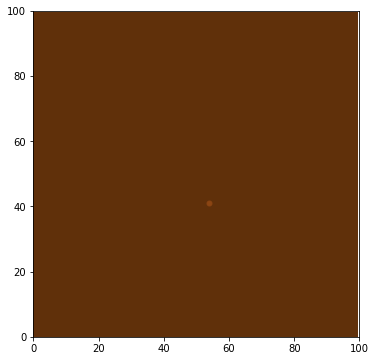

In [2]:
my_env = Environment()
animal = Animal_Agent(sex = 'F')
my_env.add_agent(animal)
my_env.simulate(10)

The bug was in regards to the order of parameters 'def procreate(self,time,all_agents):'  The bug casued the code to not be able to process the procreate function, therefore resulting in an error.

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


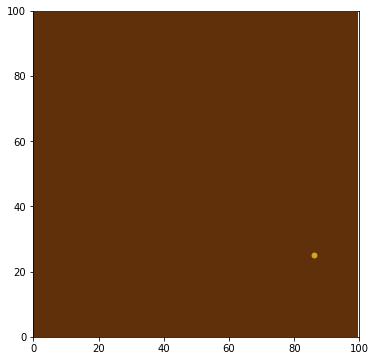

In [3]:
my_env = Environment()
animal = Animal_Agent(sex = 'F')
animal.set_allele(0,1)
my_env.add_agent(animal)
my_env.simulate(10)


### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

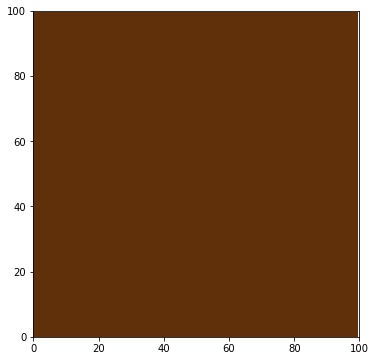

In [9]:
animal2 =  Animal_Agent(ptype = 'predator', shape ="P", color = "red")
my_env.add_agent(animal2)
my_env.simulate(100)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

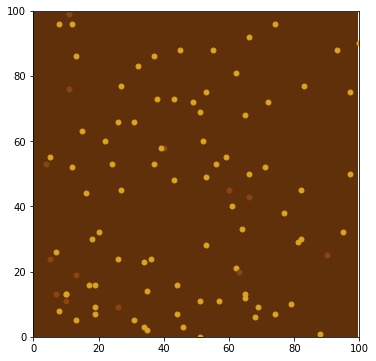

In [10]:
prey1 = Animal_Agent(sex='F')
prey1.set_allele(1,1)
my_env.add_agent(prey1)

prey2 = Animal_Agent(sex='M')
prey2.set_allele(0,1)
my_env.add_agent(prey2)

prey3 = Animal_Agent(sex='F')
prey3.set_allele(0,1)
my_env.add_agent(prey3)

prey4 = Animal_Agent(sex='M')
prey4.set_allele(0,0)
my_env.add_agent(prey4)

prey5 = Animal_Agent(sex='F')
prey5.set_allele(1,1)
my_env.add_agent(prey5)

predator1 = Animal_Agent(ptype='predator', shape='v', color='blue')
my_env.add_agent(predator1)

predator2 = Animal_Agent(ptype='predator', shape='v', color='blue')
my_env.add_agent(predator2)

predator3 = Animal_Agent(ptype='predator', shape='v', color='blue')
my_env.add_agent(predator3)

predator4 = Animal_Agent(ptype='predator', shape='v', color='blue')
my_env.add_agent(predator4)

predator5 = Animal_Agent(ptype='predator', shape='v', color='blue')
my_env.add_agent(predator5)

my_env.simulate(100)

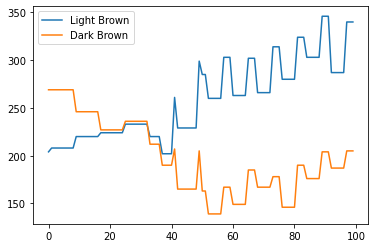

In [24]:
my_env.simulate_plot_populations(100)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The popuation flucuates periodically over time. They start by following similar growth patterens, but then over time come to around a 50/50 light to dark split, which then causes light brown to dominate the next period as they have the dominant genes. 

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [184]:
class Mouse(Animal_Agent):
    def __init__(self, sex="F", ptype="prey", shape="o", color="gray"):
        super().__init__(sex=sex, ptype=ptype, shape=shape, color=color)
        self.catch_probability = None

    def set_allele(self, gene_idx, value):
        super().set_allele(gene_idx, value)
        if gene_idx == 0:
            if value == 0:
                self.catch_probability = 0.05
            elif value == 1:
                self.catch_probability = 0.95

    def procreate(self, partner):
        if isinstance(partner, Mouse) and self.sex != partner.sex:
            child = Mouse(sex=random.choice(["M", "F"]))
            for i in range(self.num_genes):
                child.set_allele(i, random.choice([self.get_allele(i), partner.get_allele(i)]))
            return child
        else:
            return None

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [16]:
class Hawk(Animal_Agent):
    
    def __init__(self, sex='M', ptype='predator', shape='8', color='red'):
        super().__init__(sex, ptype, shape, color)
    
    def hunt(self, prey):
        if prey.ptype == 'prey':
            catch_probability = prey.catch_probability
            if np.random.random() < catch_probability:
                self.eat(prey)
                return True
        return False

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

In [18]:
new_env = Environment()

prey1 = Mouse(sex='F')
prey1.set_allele(1,1)
my_env.add_agent(prey1)

prey2 = Mouse(sex='M')
prey2.set_allele(0,1)
new_env.add_agent(prey2)

prey3 = Mouse(sex='F')
prey3.set_allele(0,1)
new_env.add_agent(prey3)

prey4 = Mouse(sex='M')
prey4.set_allele(0,0)
new_env.add_agent(prey4)

prey5 = Mouse(sex='F')
prey5.set_allele(1,1)
new_env.add_agent(prey5)

predator1 = Hawk(ptype='predator', shape='v', color='blue')
new_env.add_agent(predator1)

predator2 = Hawk(ptype='predator', shape='v', color='blue')
new_env.add_agent(predator2)

predator3 = Hawk(ptype='predator', shape='v', color='blue')
new_env.add_agent(predator3)

predator4 = Hawk(ptype='predator', shape='v', color='blue')
new_env.add_agent(predator4)

predator5 = Hawk(ptype='predator', shape='v', color='blue')
new_env.add_agent(predator5)

new_env.simulate(100)

ValueError: invalid literal for int() with base 10: 'M'

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

I was unable to get the mouse and Hawk classes to run with the Animal_agent class, however I would predict that with the increase probability of brown mice being caught there would be a linear increase in dark brown mice because they have a low hunted rate. 

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.